- research.baidu.com/Blog/index-view?id=89
- www.reddit.com/r/MachineLearning/comments/7i8yhq/r_deep_learning_scaling_is_predictable/
- supercomputersfordl2017.github.io/Presentations/scaling-is-predictable.pdf

- www.youtube.com/watch?v=XHRm3Ot5y2s
- pdfs.semanticscholar.org/e7a7/06562f313664441c54e379b04f898ee18c0e.pdf

- arthurdouillard.com/post/deep-learning-scaling/<br>
"Given the power law, researchers can train their new architecture on a small dataset, and have a good estimation of how it would scale on a bigger dataset. It may also give a reasonable estimation of the hardware and time requirements to reach a chosen generalization error."

- www.kdnuggets.com/2018/05/deep-learning-scaling-predictable-empirically.html<br>
"Finding better model architectures often depends on ‘unreliable epiphany,’ and as the results show, has limited impact compared to increasing the amount of data available. We’ve known this for some time of course, including from the 2009 Google paper, ‘The unreasonable effectiveness of data.’ The results from today’s paper help us to quantify the data advantage across a range of deep learning applications. The key to understanding is captured in the following equation:"

- **Power laws, Pareto distributions and Zipf’s law**<br>
arxiv.org/pdf/cond-mat/0412004.pdf

In [101]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import sys
from pathlib import Path
from glob import glob

import sklearn
import numpy as np
import pandas as pd
from glob import glob

from keras.models import load_model

import matplotlib
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
file_path = Path(os.getcwd())
file_path

PosixPath('/vol/ml/apartin/projects/pilot1/apps/lrn_crv')

In [103]:
utils_path = file_path / '../../utils'
sys.path.append(str(utils_path))
# import utils
# from lrn_crv import *
import lrn_crv

In [5]:
%matplotlib inline

In [5]:
# Results dir
maindir = file_path / '../../out/lrn_crv'

# Different power-law functions

In [6]:
from scipy import optimize

"""
def power_law_func_2prm(x, alpha, beta):
    return alpha * np.power(x, beta)

def fit_power_law_2prm(x, y, p0: list=[30, -0.3]):
    """ Fit learning curve data (train set size vs ) to power-law. """
    # def power_law_func(x, alpha, beta):  return alpha * np.power(x, beta)
    
    prms, prms_cov = optimize.curve_fit(power_law_func_2prm, x, y, p0=p0)
    prms_dct = {}
    prms_dct['alpha'], prms_dct['beta'] = prms[0], prms[1], prms[2]
    return prms_dct
"""


def power_law_func_3prm(x, alpha, beta, gamma):
    """ docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.power.html """
    return alpha * np.power(x, beta) + gamma

def fit_power_law_3prm(x, y, p0: list=[30, -0.3, 0.06]):
    """ Fit learning curve data (train set size vs ) to power-law. """
    # def power_law_func(x, alpha, beta, gamma):  return alpha * np.power(x, beta) + gamma

    prms, prms_cov = optimize.curve_fit(power_law_func_3prm, x, y, p0=p0)
    prms_dct = {}
    prms_dct['alpha'], prms_dct['beta'], prms_dct['gamma'] = prms[0], prms[1], prms[2]
    return prms_dct


"""
def power_law_func_4prm(x, alpha, beta, gamma1, gamma2):
    return alpha * np.power(x, beta) + gamma1 + gamma2

def fit_power_law_4prm(x, y, p0:list=[30, -0.3, 0.06, 0.12]):
    # def power_law_func(x, alpha, beta, gamma1, gamma2):  return alpha * np.power(x, beta) + gamma1 + gamma2

    prms, prms_cov = optimize.curve_fit(power_law_func_4prm, x, y, p0=p0)
    prms_dct = {}
    prms_dct['alpha'], prms_dct['beta'], prms_dct['gamma1'], prms_dct['gamma2'] = prms[0], prms[1], prms[2], prms[3]
    return prms_dct
"""

# Power-law plots funcs

In [7]:
def scale_ticks_params(tick_scale='linear'):
    """ Helper function for learning cureve plots.
    Args:
        tick_scale : available values are [linear, log2, log10]
    """
    if tick_scale == 'linear':
        base = None
        label_scale = 'Linear scale'
    else:
        if tick_scale == 'log2':
            base = 2
            label_scale = 'Log2 scale'
        elif tick_scale == 'log10':
            base = 10
            label_scale = 'Log10 scale'
        else:
            raise ValueError('The specified tick scale is not supported.')
    return base, label_scale


def plot_lrn_crv_power_law(x, y, plot_fit:bool=True, metric_name:str='score',
                           xtick_scale:str='log2', ytick_scale:str='log2',
                           xlim:list=None, ylim:list=None, title:str=None, figsize=(7,5),
                           label=None, ax=None):
    x = x.ravel()
    y = y.ravel()
    
    fontsize = 13
    if ax is None: fig, ax = plt.subplots(figsize=figsize)
    
    # Plot raw data
    if label is None: label='data'
    ax.plot(x, y, '.-', color=None, label=label);

    # Fit power-law (3 params)
    power_law_params = fit_power_law_3prm(x, y)
    yfit = power_law_func_3prm(x, **power_law_params)
    
    # Plot fit
    if plot_fit: ax.plot(x, yfit, '--', color=None, label=f'{label} Trend');    
        
    basex, xlabel_scale = scale_ticks_params(tick_scale=xtick_scale)
    basey, ylabel_scale = scale_ticks_params(tick_scale=ytick_scale)
    
    ax.set_xlabel(f'Training Dataset Size ({xlabel_scale})', fontsize=fontsize)
    if 'log' in xlabel_scale.lower(): ax.set_xscale('log', basex=basex)

    ylabel = ' '.join(s.capitalize() for s in metric_name.split('_'))
    ax.set_ylabel(f'{ylabel} ({ylabel_scale})', fontsize=fontsize)
    if 'log' in ylabel_scale.lower(): ax.set_yscale('log', basey=basey)
        
    # ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    # ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    # Add equation (text) on the plot
    # matplotlib.org/3.1.1/gallery/text_labels_and_annotations/usetex_demo.html#sphx-glr-gallery-text-labels-and-annotations-usetex-demo-py
    # eq = r"$\varepsilon_{mae}(m) = \alpha m^{\beta} + \gamma$" + rf"; $\alpha$={power_law_params['alpha']:.2f}, $\beta$={power_law_params['beta']:.2f}, $\gamma$={power_law_params['gamma']:.2f}"
    # eq = rf"$\varepsilon(m) = {power_law_params['alpha']:.2f} m^{power_law_params['beta']:.2f} + {power_law_params['gamma']:.2f}$" # TODO: make this work
    
    eq = r"$\varepsilon(m) = \alpha m^{\beta}$" + rf"; $\alpha$={power_law_params['alpha']:.2f}, $\beta$={power_law_params['beta']:.2f}"
    # xloc = 2.0 * x.min()
    xloc = x.min() + 0.01*(x.max() - x.min())
    yloc = y.min() + 0.9*(y.max() - y.min())
    ax.text(xloc, yloc, eq,
            {'color': 'black', 'fontsize': fontsize, 'ha': 'left', 'va': 'center',
             'bbox': {'boxstyle':'round', 'fc':'white', 'ec':'black', 'pad':0.2}})
    
    # matplotlib.org/users/mathtext.html
    # ax.set_title(r"$\varepsilon_{mae}(m) = \alpha m^{\beta} + \gamma$" + rf"; $\alpha$={power_law_params['alpha']:.2f}, $\beta$={power_law_params['beta']:.2f}, $\gamma$={power_law_params['gamma']:.2f}");
    if ylim is not None: ax.set_ylim(ylim)
    if xlim is not None: ax.set_ylim(xlim)
    if title is None: title='Learning curve (power-law)'
    ax.set_title(title)
    
    ax.legend(loc='best', frameon=True, fontsize=fontsize)
    ax.grid(True)
    # return fig, ax, power_law_params
    return ax, power_law_params

In [8]:
def load_scores(run_dir, metric_name='mean_absolute_error', cv_folds=5):
    """ ... """
    scores = pd.read_csv(run_dir/'lrn_crv_scores.csv')
    df = scores.loc[scores['tr_set']==False]
    
    data_sizes = sorted(df['tr_size'].unique())
    aa = df[df['metric']==metric_name].reset_index(drop=True)
    aa.sort_values('tr_size', inplace=True)

    tr = aa[aa['tr_set']==True]
    vl = aa[aa['tr_set']==False]

    tr = tr.iloc[:, -cv_folds:]
    vl = vl.iloc[:, -cv_folds:]

    rslt = []
    rslt.append(data_sizes)
    rslt.append(tr.values if tr.values.shape[0]>0 else None)
    rslt.append(vl.values if vl.values.shape[0]>0 else None)

    return rslt, scores

In [9]:
def get_xy(scores, metric_name='mean_absolute_error'):
    """ Get x and y from scores (for specific run). """
    dd = scores
    dd = dd[dd['metric']==metric_name]
    dd = dd[dd['tr_set']==False]
    dd.reset_index(drop=True, inplace=True)
    dd.drop(columns=['metric', 'tr_set'], inplace=True)
    
    x = dd.tr_size.values
    y = dd.iloc[:,1:].mean(axis=1).values
    return x, y

In [38]:
# rslt_dir = maindir / 'ccle.lgb_reg.cvf5.rna.dsc.AUC'
# rslt_dir = maindir / 'gdsc.lgb_reg.cvf5.rna.dsc.AUC'
# rslt_dir = maindir / 'gdsc.lgb_reg.cvf1.rna.dsc.AUC'
# rslt_dir = maindir / 'topNcode.lgb_reg.cvf5.rna.dsc.AUC_2019-7-2_h15-m29'

rslt_dir = maindir / 'topNcode.lgb_reg.cvf10.rna.dsc.AUC_2019-8-13_h9-m15'

metric_name = 'mean_absolute_error'
rslt, scores = load_scores(rslt_dir, metric_name=metric_name, cv_folds=1)

id0 = 0
rslt[0], rslt[2] = rslt[0][id0:], rslt[2][id0:]
x, y = get_xy(scores, metric_name=metric_name)
x, y = x[id0:], y[id0:]

In [44]:
# xtick_scale='linear'
xtick_scale='log2'
i0 = 7 # 0
i1 = None # 17

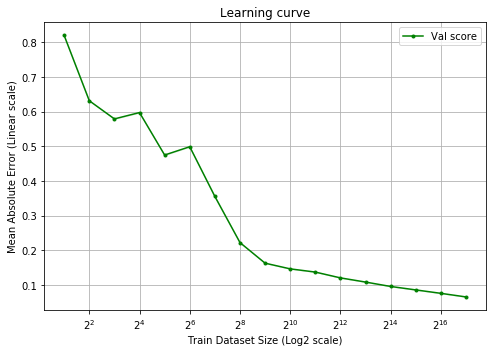

In [45]:
fig, ax = lrn_crv.plot_lrn_crv(
    rslt, metric_name=metric_name, ylim=None,
    xtick_scale=xtick_scale, ytick_scale='linear');
# ax.plot(x[i0:i1], y[i0:i1], 'o', color='r'); ax.set_title(f'LGBM_Reg; index=[{i0}, {i1}]')

{'alpha': 0.9705426161412752, 'beta': -0.3242271630124819, 'gamma': 0.05001237547559623}


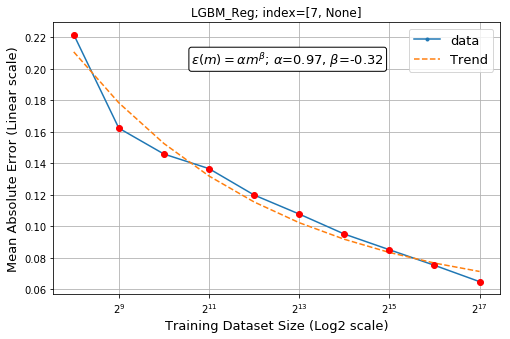

In [46]:
ax, power_law_params = plot_lrn_crv_power_law(
    x[i0:i1], y[i0:i1], plot_fit=True, metric_name=metric_name, title=f'LGBM_Reg; index=[{i0}, {i1}]',
    xtick_scale=xtick_scale, ytick_scale='linear', figsize=(8,5));

ax.plot(x[i0:i1], y[i0:i1], 'o', color='r'); ax.set_title(f'LGBM_Reg; index=[{i0}, {i1}]')

# fig, ax, power_law_params = lrn_crv.plot_lrn_crv_power_law(
#     x[i0:i1], y[i0:i1], plot_fit=True, metric_name=metric_name, title=f'LGBM_Reg; index=[{i0}, {i1}]',
#     xtick_scale=xtick_scale, ytick_scale='linear', figsize=(8,5));

print(power_law_params)

Text(0.5, 1.0, 'LGBM_Reg; index=[7, None]')

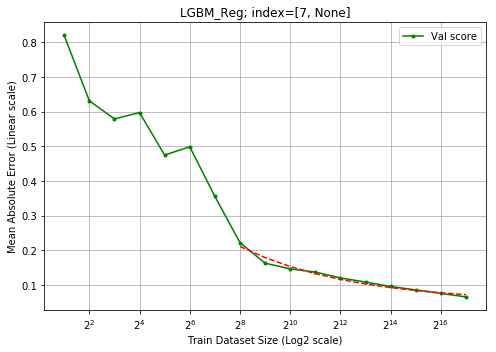

In [47]:
# Fit data to the power-law region. Plot the fit for the entire recorded range. Plot the original data.
yfit = power_law_func_3prm(x[i0:i1], **power_law_params)

fig, ax = lrn_crv.plot_lrn_crv(
    rslt, metric_name=metric_name, ylim=None,
    xtick_scale=xtick_scale, ytick_scale='linear');

ax.plot(x[i0:i1], yfit, '--', color='r'); ax.set_title(f'LGBM_Reg; index=[{i0}, {i1}]')

# Generate learning curves from trained models

In [10]:
dirpath = Path('/vol/ml/apartin/projects/pilot1/data/processed/data_splits/topNcode_cv_simple')
xdata = pd.read_parquet( dirpath/'xdata.parquet' )
meta  = pd.read_parquet( dirpath/'meta.parquet'  )
target_name = 'AUC'
ydata = meta[[target_name]]

cv_folds = 1
tr_id = pd.read_csv( dirpath/f'{cv_folds}fold_tr_id.csv' )
vl_id = pd.read_csv( dirpath/f'{cv_folds}fold_vl_id.csv' )
src = dirpath.name.split('_')[0]

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
cols = xdata.columns
xdata = pd.DataFrame(scaler.fit_transform(xdata), columns=cols, dtype=np.float32)

In [12]:
# X = pd.DataFrame(xdata).values
# Y = pd.DataFrame(ydata).values
# del xdata, ydata

In [13]:
lc = lrn_crv.LearningCurve( X=xdata, Y=ydata, cv=None, cv_lists=(tr_id, vl_id),
                            n_shards=10, shard_step_scale='log10', args=None,
                            logger=None, outdir='nowhere' )
lc.mltype = 'reg'
del xdata, ydata, meta

In [14]:
# modelsdir = Path('/vol/ml/apartin/projects/pilot1/out/lrn_crv/topNcode.nn_reg_2layer.sgd.cvf1.rna.dsc.AUC_2019-8-13_h11-m4')
modelsdir = Path('/vol/ml/apartin/projects/pilot1/out/lrn_crv/topNcode.nn_reg_4layer.sgd.cvf1.rna.dsc.AUC_2019-8-13_h11-m4')
lc.outdir = modelsdir

In [15]:
modelspath = glob(str(modelsdir/'cv1_*'))
print(len(modelspath))
# [m.split('/')[-1].split('sz')[-1] for m in modelspath]
# mpath = [m for m in modelspath if m.split('/')[-1].split('sz')[-1]==str(128)][0]
# print(mpath)

18


In [18]:
# Start nested loop of train size and cv folds
tr_scores_all = [] # list of dicts
vl_scores_all = [] # list of dicts

# CV loop
# for fold, (tr_k, vl_k) in enumerate(zip( self.tr_dct.keys(), self.vl_dct.keys() )):
for fold, (tr_k, vl_k) in enumerate(zip( lc.tr_dct.keys(), lc.vl_dct.keys() )):
    if lc.logger is not None: lc.logger.info(f'Fold {fold+1}/{lc.cv_folds}')
    print(f'Fold {fold+1}/{lc.cv_folds}')

    tr_id = lc.tr_dct[tr_k]
    vl_id = lc.vl_dct[vl_k]

    # Samples from this dataset are randomly sampled for training
    xtr = lc.X[tr_id, :]
    ytr = lc.Y[tr_id, :]

    # A fixed set of validation samples for the current CV split
    xvl = lc.X[vl_id, :]
    yvl = np.squeeze(lc.Y[vl_id, :])        

    # Shards loop (iterate across the dataset sizes and train)
    # np.random.seed(random_state)
    # idx = np.random.permutation(len(xtr))
    idx = np.arange(len(xtr))
    for i, tr_sz in enumerate(lc.tr_shards):
        # For each shard: train model, save best model, calc tr_scores, calc_vl_scores
        if lc.logger: lc.logger.info(f'\tTrain size: {tr_sz} ({i+1}/{len(lc.tr_shards)})')
        print(f'\tTrain size: {tr_sz} ({i+1}/{len(lc.tr_shards)})')

        # Sequentially get a subset of samples (the input dataset X must be shuffled)
        xtr_sub = xtr[idx[:tr_sz], :]
        ytr_sub = np.squeeze(ytr[idx[:tr_sz], :])            

        # Get the estimator
        # stimator = ml_models.get_model(self.model_name, init_kwargs=self.init_kwargs)
        # model = estimator.model

        # Load Model
        # ------------------------------------------------------------------------------------------------------------
        mpath = [m for m in modelspath if m.split('/')[-1].split('sz')[-1]==str(tr_sz)][0]
        model = load_model(str(Path(mpath)/'model_best.h5'))
        # ------------------------------------------------------------------------------------------------------------
        
#         # Train
#         lc.eval_frac = 0.1 # 0.1 # used for early stopping
#         eval_samples = int(lc.eval_frac*xvl.shape[0])
#         eval_set = (xvl[:eval_samples, :], yvl[:eval_samples])
#         if lc.framework=='lightgbm':
#             model = lc.trn_lgbm_model(model=model, xtr_sub=xtr_sub, ytr_sub=ytr_sub, fold=fold, tr_sz=tr_sz, eval_set=eval_set)
#         elif lc.framework=='keras':
#             model = lc.trn_keras_model(model=model, xtr_sub=xtr_sub, ytr_sub=ytr_sub, fold=fold, tr_sz=tr_sz, eval_set=eval_set)
#         elif lc.framework=='pytorch':
#             pass
#         else:
#             raise ValueError(f'framework {self.framework} is not supported.')

        # Calc preds and scores TODO: dump preds
        # ... training set
        y_pred, y_true = calc_preds(model, x=xtr_sub, y=ytr_sub, mltype=lc.mltype)
        tr_scores = calc_scores(y_true=y_true, y_pred=y_pred, mltype=lc.mltype, metrics=None)
        # ... val set
        y_pred, y_true = calc_preds(model, x=xvl, y=yvl, mltype=lc.mltype)
        vl_scores = calc_scores(y_true=y_true, y_pred=y_pred, mltype=lc.mltype, metrics=None)

        # Add metadata
        tr_scores['tr_set'] = True
        tr_scores['fold'] = 'fold'+str(fold)
        tr_scores['tr_size'] = tr_sz

        vl_scores['tr_set'] = False
        vl_scores['fold'] = 'fold'+str(fold)
        vl_scores['tr_size'] = tr_sz

        # Append scores (dicts)
        tr_scores_all.append(tr_scores)
        vl_scores_all.append(vl_scores)

        # Delete the estimator/model
        del model

    # Dump intermediate results (this is useful if the run terminates before run ends)
    # tr_df_tmp = scores_to_df(tr_scores_all)
    # vl_df_tmp = scores_to_df(vl_scores_all)
    scores_all_df_tmp = pd.concat([scores_to_df(tr_scores_all), scores_to_df(vl_scores_all)], axis=0)
    scores_all_df_tmp.to_csv( lc.outdir / ('lrn_crv_scores_cv' + str(fold+1) + '.csv'), index=False )

# # Scores to df
tr_scores_df = scores_to_df( tr_scores_all )
vl_scores_df = scores_to_df( vl_scores_all )
scores_df = pd.concat([tr_scores_df, vl_scores_df], axis=0)

# # Dump final results
tr_scores_df.to_csv( lc.outdir/'tr_lrn_crv_scores.csv', index=False) 
vl_scores_df.to_csv( lc.outdir/'vl_lrn_crv_scores.csv', index=False) 
scores_df.to_csv( lc.outdir/'lrn_crv_scores.csv', index=False) 

# # Plot learning curves
# if plot:
#     plot_lrn_crv_all_metrics( scores_df, outdir=self.outdir )

Fold 1/1
	Train size: 2 (1/18)
	Train size: 4 (2/18)
	Train size: 8 (3/18)
	Train size: 16 (4/18)
	Train size: 32 (5/18)
	Train size: 64 (6/18)
	Train size: 128 (7/18)
	Train size: 256 (8/18)
	Train size: 512 (9/18)
	Train size: 1024 (10/18)
	Train size: 2048 (11/18)
	Train size: 4096 (12/18)
	Train size: 8192 (13/18)
	Train size: 16384 (14/18)
	Train size: 32768 (15/18)
	Train size: 65536 (16/18)
	Train size: 131072 (17/18)
	Train size: 228003 (18/18)


In [56]:
del xtr, ytr, xvl, yvl, xtr_sub, ytr_sub

In [17]:
def calc_preds(model, x, y, mltype):
    """ Calc predictions. """
    if mltype == 'cls':    
        if y.ndim > 1 and y.shape[1] > 1:
            y_pred = model.predict_proba(x)
            y_pred = np.argmax(y_pred, axis=1)
            y_true = np.argmax(ydata, axis=1)
        else:
            y_pred = model.predict_proba(x)
            y_pred = np.argmax(y_pred, axis=1)
            y_true = y
            
    elif mltype == 'reg':
        y_pred = model.predict(x)
        y_true = y

    return y_pred, y_true


def calc_scores(y_true, y_pred, mltype, metrics=None):
    """ Create dict of scores.
    Args:
        metrics : TODO allow to pass a string of metrics
    """
    scores = {}

    if mltype == 'cls':    
        scores['auroc'] = sklearn.metrics.roc_auc_score(y_true, y_pred)
        scores['f1_score'] = sklearn.metrics.f1_score(y_true, y_pred, average='micro')
        scores['acc_blnc'] = sklearn.metrics.balanced_accuracy_score(y_true, y_pred)

    elif mltype == 'reg':
        scores['r2'] = sklearn.metrics.r2_score(y_true=y_true, y_pred=y_pred)
        scores['mean_absolute_error'] = sklearn.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred)
        scores['median_absolute_error'] = sklearn.metrics.median_absolute_error(y_true=y_true, y_pred=y_pred)
        scores['mean_squared_error'] = sklearn.metrics.mean_squared_error(y_true=y_true, y_pred=y_pred)
    return scores


def scores_to_df(scores_all):
    """ (tricky commands) """
    df = pd.DataFrame(scores_all)
    df = df.melt(id_vars=['fold', 'tr_size', 'tr_set'])
    df = df.rename(columns={'variable': 'metric'})
    df = df.pivot_table(index=['metric', 'tr_size', 'tr_set'], columns=['fold'], values='value')
    df = df.reset_index(drop=False)
    df.columns.name = None
    return df

# Latest runs

In [168]:
lgb_dir       = maindir / 'topNcode.lgb_reg.cvf10.rna.dsc.AUC_2019-8-13_h9-m15'
nn_2layer_dir = maindir / 'topNcode.nn_reg_2layer.sgd.cvf1.rna.dsc.AUC_2019-8-13_h11-m4'
nn_4layer_dir = maindir / 'topNcode.nn_reg_4layer.sgd.cvf1.rna.dsc.AUC_2019-8-13_h11-m4'

# lgb_dir       = maindir / 'top6.lgb_reg.cvf5.rna.dsc.AUC1_2019-6-20_h15-m29'
# nn_2layer_dir = maindir / 'top6.nn_model0.sgd.cvf5.rna.dsc.AUC1_2019-6-21_h23-m20'
# nn_4layer_dir = maindir / 'top6.nn_model1.sgd.cvf5.rna.dsc.AUC1_2019-6-22_h22-m44'

In [173]:
# xtick_scale='linear'
xtick_scale='log2'
i0 = 0 # 0
i1 = None # 17

metric_name = 'mean_absolute_error'
rslt_lgb, scores_lgb = load_scores(lgb_dir, metric_name=metric_name, cv_folds=1)
rslt_2l, scores_2l = load_scores(nn_2layer_dir, metric_name=metric_name, cv_folds=1)
rslt_4l, scores_4l = load_scores(nn_4layer_dir, metric_name=metric_name, cv_folds=1)

def fnc(rslt, scores, id0, metric_name, i0, i1):
    rslt[0], rslt[2] = rslt[0][i0:], rslt[2][i0:]
    x, y = get_xy(scores, metric_name=metric_name)
    # x, y = x[i0:i1], y[i0:i1]
    return rslt, x, y
    
i0 = 12
i1 = None
rslt_lgb, x_lgb, y_lgb = fnc(rslt_lgb, scores_lgb, id0, metric_name, i0, i1)
rslt_2l, x_2l, y_2l = fnc(rslt_2l, scores_2l, id0, metric_name, i0, i1)
rslt_4l, x_4l, y_4l = fnc(rslt_4l, scores_4l, id0, metric_name, i0, i1)
    
# rslt_2l[0], rslt_2l[2] = rslt_2l[0][id0:], rslt_2l[2][id0:]    
    
# id0 = 0
# rslt[0], rslt[2] = rslt[0][id0:], rslt[2][id0:]
# x, y = get_xy(scores, metric_name=metric_name)
# x, y = x[id0:], y[id0:]

{'alpha': 0.4301457904419162, 'beta': -0.09515192876973093, 'gamma': -0.07504428463102132}
{'alpha': 0.5001889297039775, 'beta': -0.18935034855534577, 'gamma': 0.005694966667988876}


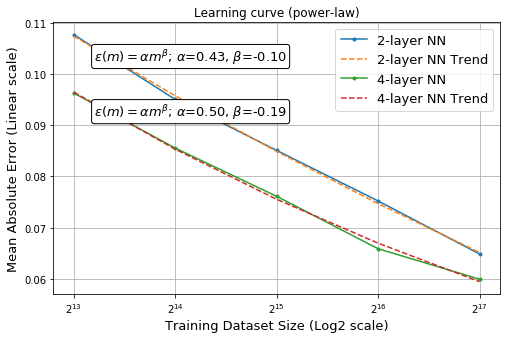

In [176]:
# Plot power-law fits on the same plot
ax, power_law_params = plot_lrn_crv_power_law(
    x_2l[i0:i1], y_2l[i0:i1], plot_fit=True, metric_name=metric_name,
    xtick_scale=xtick_scale, ytick_scale='linear', label='2-layer NN', figsize=(8,5));
print(power_law_params)

ax, power_law_params = plot_lrn_crv_power_law(
    x_4l[i0:i1], y_4l[i0:i1], plot_fit=True, metric_name=metric_name,
    xtick_scale=xtick_scale, ytick_scale='linear', label='4-layer NN', figsize=(8,5), ax=ax);
print(power_law_params)

In [81]:
ax = lrn_crv.plot_lrn_crv(
    rslt_4l, metric_name=metric_name, ylim=None,
    xtick_scale=xtick_scale, ytick_scale='linear', ax=ax);
# ax.plot(x[i0:i1], y[i0:i1], 'o', color='r'); ax.set_title(f'LGBM_Reg; index=[{i0}, {i1}]')

<Figure size 432x288 with 0 Axes>

# Old runs (lgb, nn1, nn2)

In [72]:
# run_dir = maindir / 'gdsc.lgb_reg.cvf5.rna.dsc.AUC_2019-7-2_h17-m37'
lgb_dir     = maindir / 'top6.lgb_reg.cvf5.rna.dsc.AUC1_2019-6-20_h15-m29'
nn_reg0_dir = maindir / 'top6.nn_model0.sgd.cvf5.rna.dsc.AUC1_2019-6-21_h23-m20'
nn_reg1_dir = maindir / 'top6.nn_model1.sgd.cvf5.rna.dsc.AUC1_2019-6-22_h22-m44'

# nn_reg0_dir = maindir / 'top6.nn_model0.clr.cvf5.rna.dsc.AUC1_2019-6-20_h16-m49'
# nn_reg1_dir = maindir / 'top6.nn_model1.clr.cvf5.rna.dsc.AUC1_2019-6-20_h16-m50'

In [73]:
metric_name='mean_absolute_error'

lgb_rslt,     lgb_scores     = load_scores(lgb_dir, metric_name=metric_name)
nn_reg0_rslt, nn_reg0_scores = load_scores(nn_reg0_dir, metric_name=metric_name)
nn_reg1_rslt, nn_reg1_scores = load_scores(nn_reg1_dir, metric_name=metric_name)

# xtick_scale='linear'
xtick_scale='log2'
ylim=None
# ylim=[0.065, 0.110]

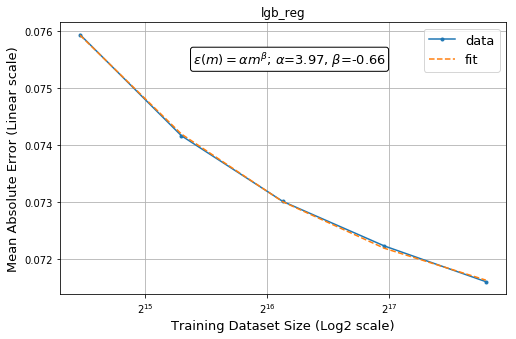

In [74]:
x, y = get_xy(lgb_scores, metric_name=metric_name)

fig, ax, power_law_params = lrn_crv.plot_lrn_crv_power_law(
    x, y, plot_fit=True, metric_name=metric_name, title='lgb_reg', ylim=ylim,
    xtick_scale=xtick_scale, ytick_scale='linear', figsize=(8,5));

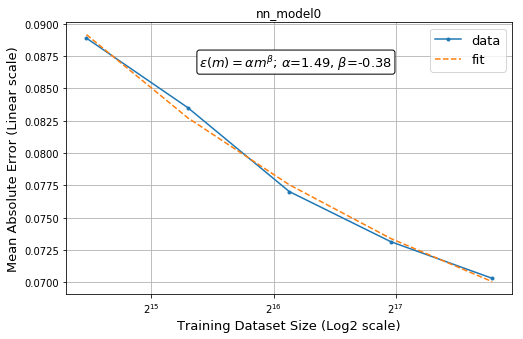

In [75]:
x, y = get_xy(nn_reg0_scores, metric_name=metric_name)

fig, ax, power_law_params = lrn_crv.plot_lrn_crv_power_law(
    x, y, plot_fit=True, metric_name=metric_name, title='nn_model0', ylim=ylim,
    xtick_scale=xtick_scale, ytick_scale='linear', figsize=(8,5));

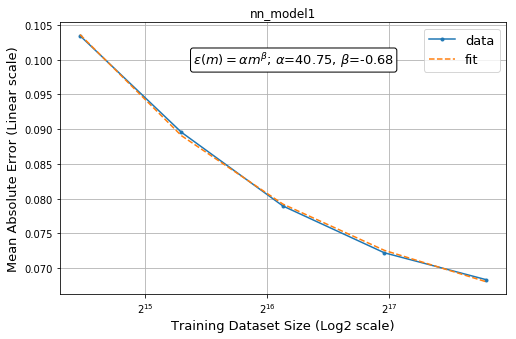

In [76]:
x, y = get_xy(nn_reg1_scores, metric_name=metric_name)

fig, ax, power_law_params = lrn_crv.plot_lrn_crv_power_law(
    x, y, plot_fit=True, metric_name=metric_name, title='nn_model1', ylim=ylim,
    xtick_scale=xtick_scale, ytick_scale='linear', figsize=(8,5));

# Plotting learning curves on log scale

- https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
- https://stackoverflow.com/questions/14530113/set-ticks-with-logarithmic-scale
- https://stackoverflow.com/questions/21920233/matplotlib-log-scale-tick-label-number-formatting/33213196

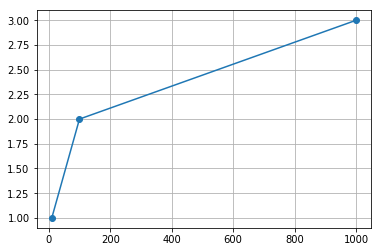

In [49]:
fig, ax = plt.subplots()
ax.plot([10, 100, 1000], [1,2,3], 'o-')
ax.set_xscale('linear')
# ax.set_xticks([10, 100, 1000])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.grid(True)

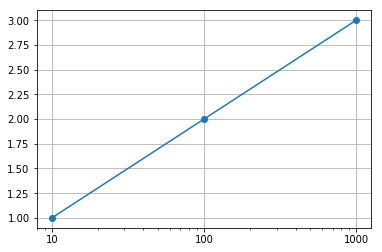

In [52]:
fig, ax = plt.subplots()
ax.plot([10, 100, 1000], [1,2,3], 'o-')
ax.set_xscale('log', basex=10)
# ax.set_xticks([10, 100, 1000])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.grid(True)

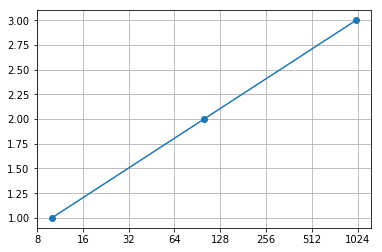

In [45]:
fig, ax = plt.subplots()
ax.plot([10, 100, 1000], [1,2,3], 'o-')
ax.set_xscale('log', basex=2)
# ax.set_xticks([10, 100, 1000])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.grid(True)

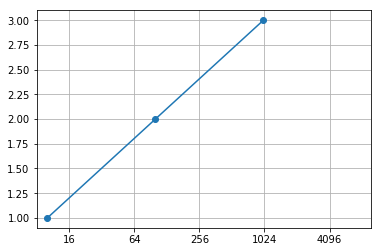

In [55]:
fig, ax = plt.subplots()
ax.plot([10, 100, 1000], [1,2,3], 'o-')
ax.set_xscale('log', basex=2)
# ax.set_xticks([20, 200, 500])
ax.set_xlim([0, 10000])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.grid(True)

In [35]:
np.array([2**x for x in range(11)])

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])

In [30]:
fig1, ax1 = plt.subplots()
ax1.plot([10, 100, 1000], [1,2,3])
ax1.set_xscale('log')
ax1.set_xticks([20, 200, 500])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.grid(True)

0